<a href="https://colab.research.google.com/github/Harshkkk6/Task1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning and Preprocessing

Importing dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset to a pandas dataframe
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#rows and columns
titanic_data.shape

(891, 12)

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#finding missing values
titanic_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
#dropping cabin section as its not important
titanic_data = titanic_data.drop(columns ='Cabin')

In [10]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


<ipython-input-10-9bcc38b8c29e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


In [11]:
titanic_data.shape

(891, 11)

In [12]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0




*   0 --> not survived
*   1 --> survived




In [13]:
#counting the number of people survived
survived = titanic_data['Survived'].value_counts()
survived

,count
Survived,
0,549
1,342


In [14]:
# Group the data by sex and survival status
survived_by_sex = titanic_data.groupby(['Sex', 'Survived'])['Survived'].count()

# Print the results
survived_by_sex


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [15]:
# Group the data by Pclass and survival status
survived_by_class = titanic_data.groupby(['Pclass','Survived'])['Survived'].count()

# Print the results
survived_by_class

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [16]:
# Calculate the average age of passengers who survived and didn't survive
average_age_by_survival = titanic_data.groupby('Survived')['Age'].mean()

# Print the results
average_age_by_survival


,Age
Survived,
0,30.415100
1,28.549778


In [17]:
#describing the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Encoding categorical features using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Display the updated DataFrame
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [19]:
from sklearn.preprocessing import StandardScaler

# Assuming 'titanic_data' is your DataFrame
numerical_features = ['Age', 'Fare']  # Add other numerical columns as needed

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your numerical features
scaler.fit(titanic_data[numerical_features])

# Transform the numerical features
titanic_data[numerical_features] = scaler.transform(titanic_data[numerical_features])

# Display the updated DataFrame
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.592481,1,0,A/5 21171,-0.502445,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,1,0,PC 17599,0.786845,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.284663,0,0,STON/O2. 3101282,-0.488854,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,1,0,113803,0.420730,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.407926,0,0,373450,-0.486337,True,False,True


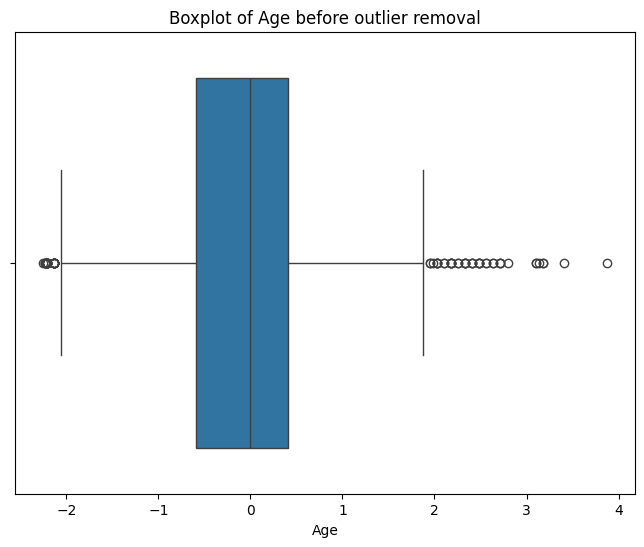

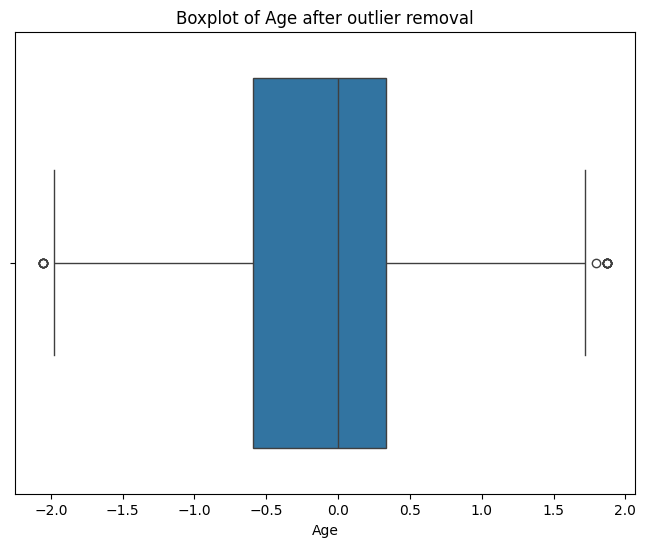

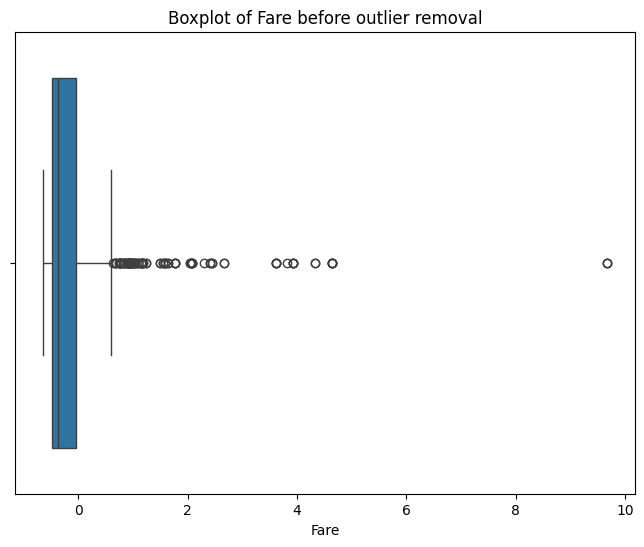

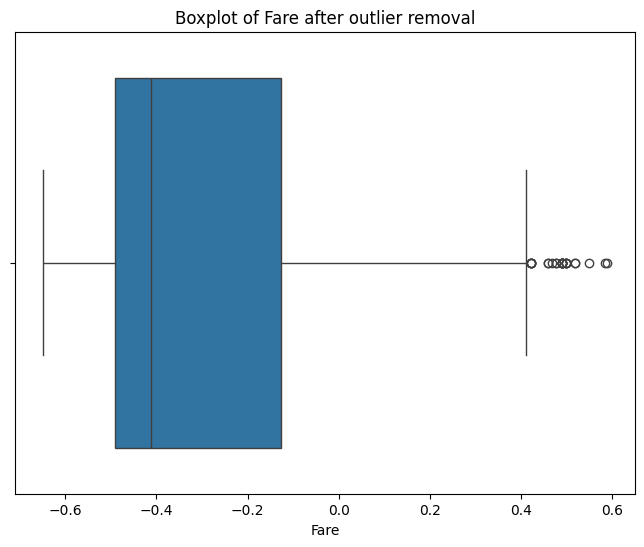

In [20]:

numerical_features = ['Age', 'Fare']

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=titanic_data[col])
    plt.title(f'Boxplot of {col} before outlier removal')
    plt.show()
    titanic_data = remove_outliers_iqr(titanic_data,col)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=titanic_data[col])
    plt.title(f'Boxplot of {col} after outlier removal')
    plt.show()
